**Nombre:** Facundo Miglierini
# Parte 1
## Enunciado asignado
**Enunciado 3:** dado el archivo de registros de jugadas (eventos) de MemPy, mostrar un gráfico que dada una partida, muestre hasta 5 palabras con las que se jugó  y la cantidad de intentos  necesarios para encontrarlas. Para elegir la partida, deben mostrar los IDs existentes en el dataset y desde teclado ingresar la opción elegida.

IDs de partidas existentes en el dataset: 
[1 2 3 4 5 6 7]



Ingrese número de partida: 1


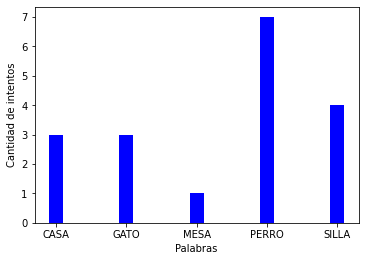

In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def abrir_archivo():
    df = pd.read_csv('Datos de prueba.csv')
    columns = ['Tiempo', 'Partida', 'Cantidad_palabras', 'Evento', 'Nick', 
               'Genero', 'Edad', 'Estado', 'Palabra', 'Nivel']
    df.columns = columns
    return df

def ingresar_partida():
    return int(input('Ingrese número de partida: '))

def retornar_info_partida(df, num_partida):
    return df[(df['Partida'] == num_partida) & (df['Evento'] == 'intento')]

def generar_grafico(*data):
    fig = plt.figure()
    x = np.arange(len(data[0]))
    
    ax = fig.add_axes([0,0,0.75,0.75])
    ax.bar(x, data[1], color = 'b', width = 0.2)

    ax.set_xticks(x)
    ax.set_xticklabels(data[0])
    ax.set_xlabel("Palabras")
    ax.set_ylabel("Cantidad de intentos")
    plt.show()

df = abrir_archivo()
ids = df['Partida'].unique()
print('IDs de partidas existentes en el dataset: ')
print(ids)
print('\n'*2)
num_partida = ingresar_partida()
if num_partida in ids:
    df = retornar_info_partida(df, num_partida)
    df = df.groupby('Palabra')['Palabra'].count()[:5]
    cantidades = df.values.tolist()
    labels = df.index.tolist()
    generar_grafico(labels, cantidades)
else:
    print('No se ha encontrado una partida con dicho ID.')

# Parte 2

## Dataset: Países del Mundo

### Criterio: Países de Asia y Oceanía
Link: https://www.kaggle.com/fernandol/countries-of-the-world

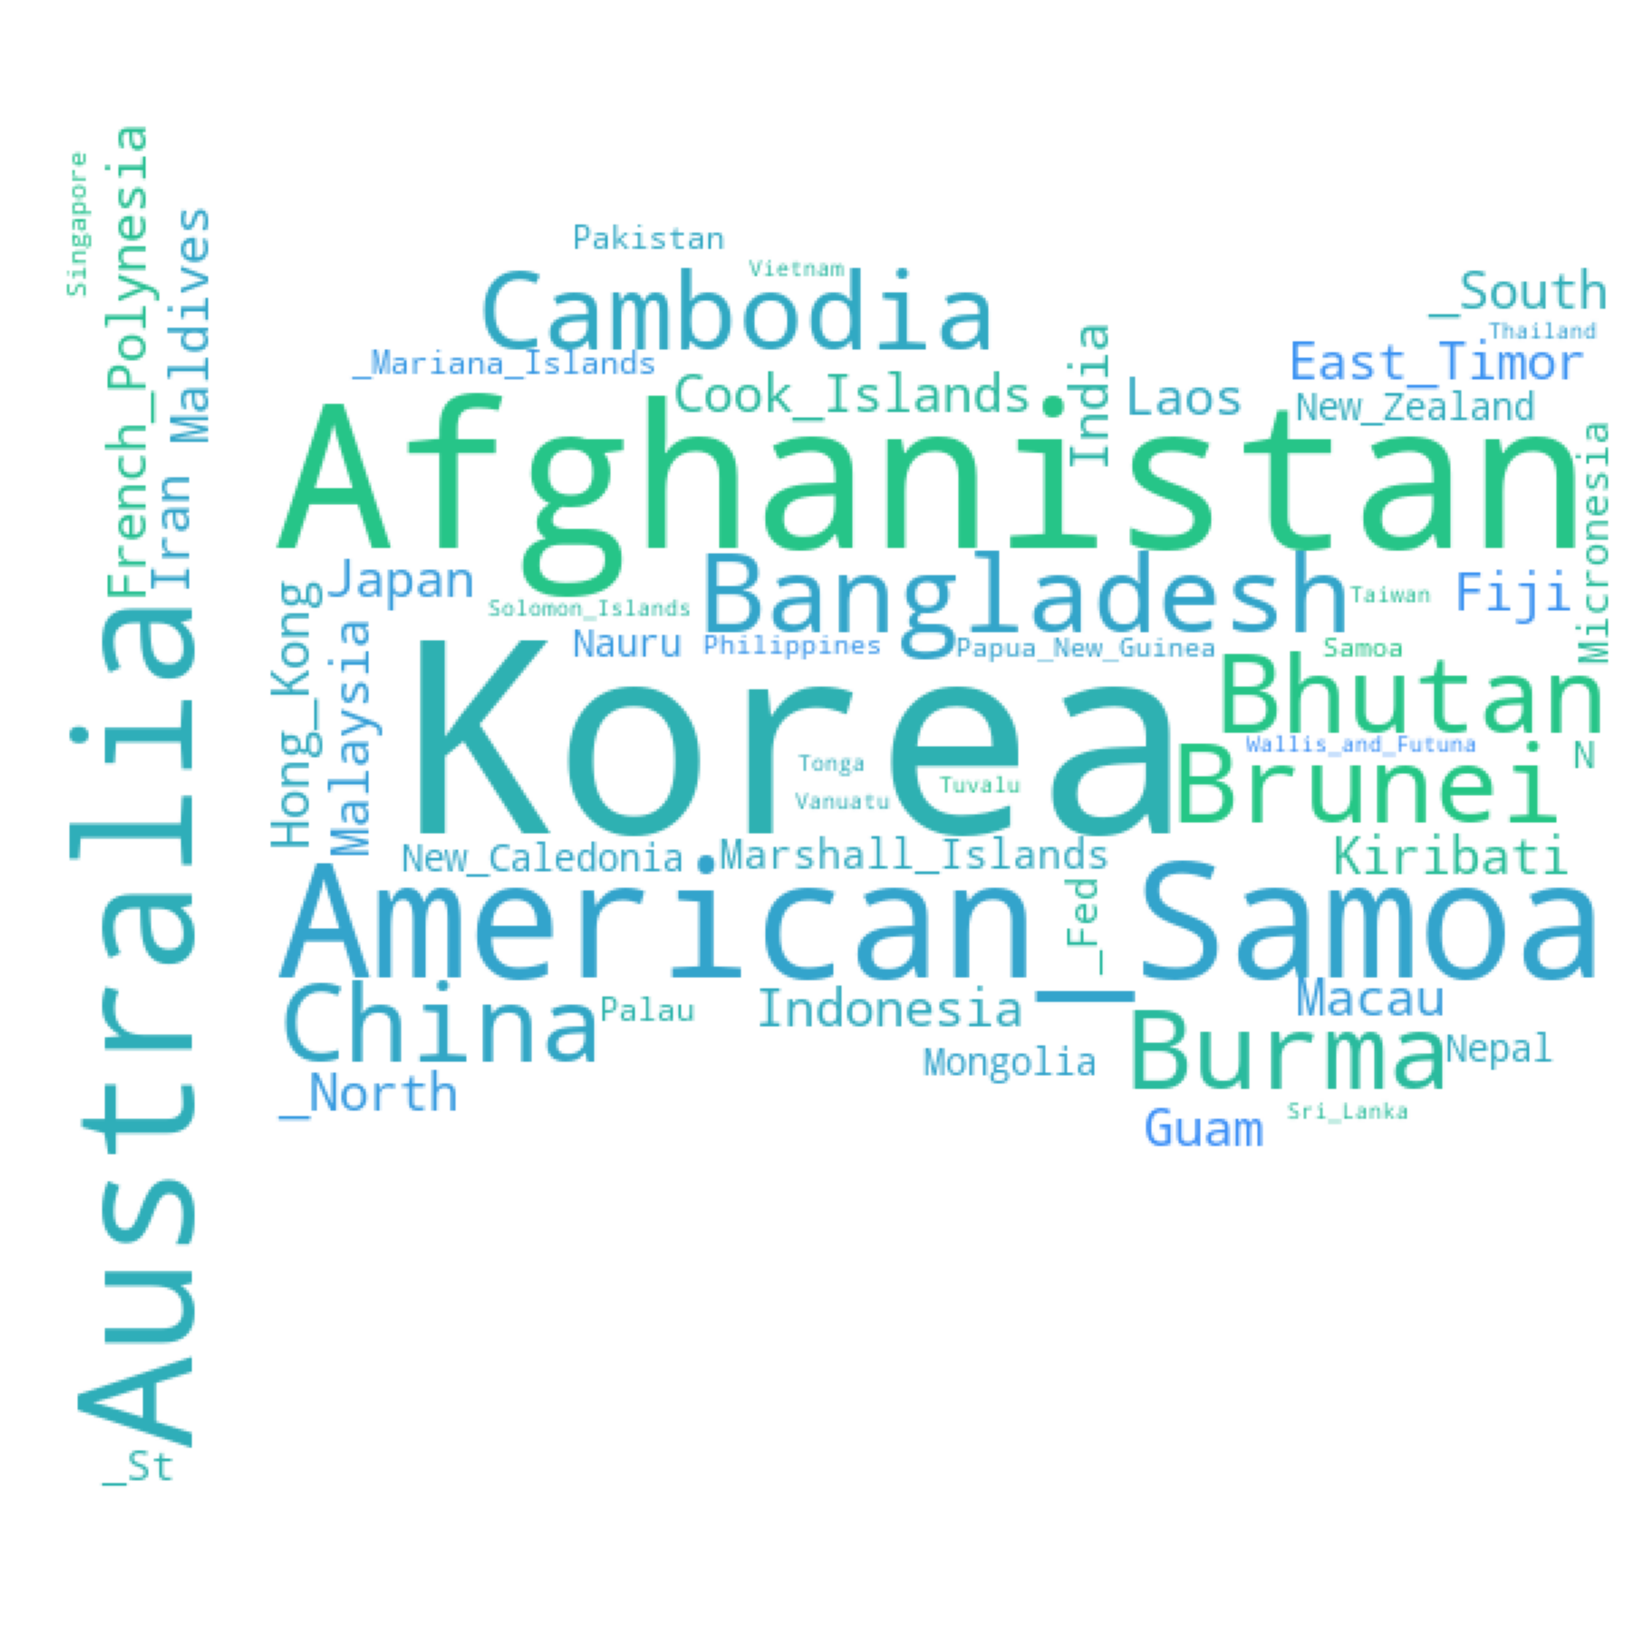

In [39]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import pandas as pd
import numpy as np
from PIL import Image

def abrir_archivo():
    rep = {'ASIA (EX. NEAR EAST)' : 'ASIA'}
    df = pd.read_csv('countries_of_the_world.csv')
    df['Region'] = df['Region'].apply(lambda x: x.rstrip()).replace(rep)
    return df

def filter_asia_oceania(df):
    return df[(df['Region'] == 'ASIA') | (df['Region'] == 'OCEANIA')]['Country']

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off");

df = abrir_archivo()
df = filter_asia_oceania(df)
words = df.tolist()
words = list(map(lambda x : x.rstrip().replace(' ', '_'), words))
text = " ".join(words)
colores = ["#25C785", "#3C8EFA"]
cmap = cl.LinearSegmentedColormap.from_list("World", colores)

mask = np.array(Image.open('Flag.png'))

wordcloud = WordCloud(width = 600, height = 600, random_state=1,
            background_color='white', colormap=cmap, collocations=False, 
            stopwords = STOPWORDS, mask=mask).generate(text)

plot_cloud(wordcloud)
